In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
import sklearn.tree as tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline


df = pd.read_csv('../data/hitters.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [2]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [3]:
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True)

<Axes: >

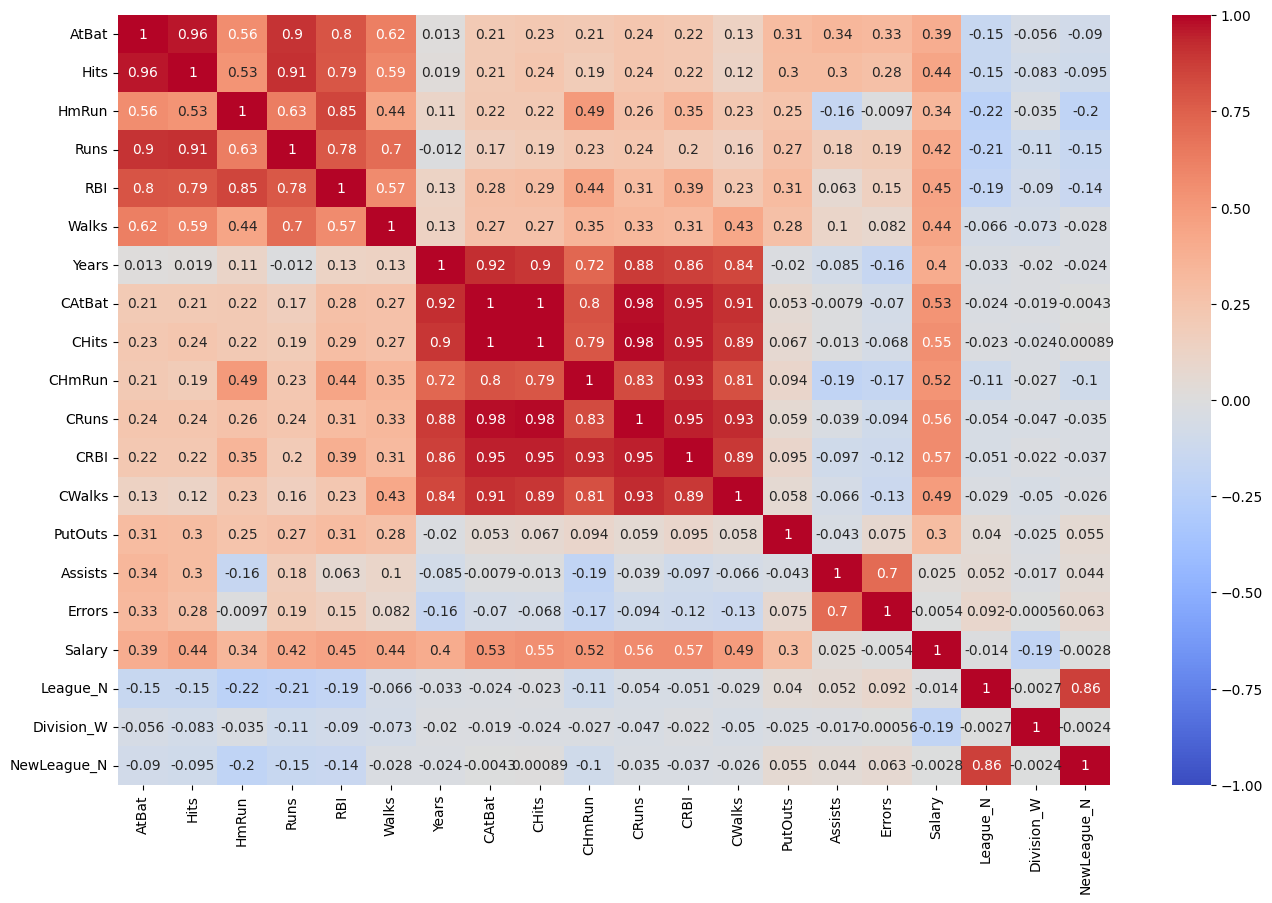

In [4]:
ax, fig = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

[Text(0.44, 0.9, 'CHits <= 450.0\nsamples = 210\nvalue = 543.665'),
 Text(0.2, 0.7, 'CWalks <= 122.5\nsamples = 95\nvalue = 214.539'),
 Text(0.08, 0.5, 'CRuns <= 10.0\nsamples = 77\nvalue = 173.152'),
 Text(0.04, 0.3, 'samples = 1\nvalue = 920.0'),
 Text(0.12, 0.3, 'CHits <= 182.0\nsamples = 76\nvalue = 163.325'),
 Text(0.08, 0.1, 'samples = 44\nvalue = 111.045'),
 Text(0.16, 0.1, 'samples = 32\nvalue = 235.208'),
 Text(0.32, 0.5, 'PutOuts <= 981.0\nsamples = 18\nvalue = 391.583'),
 Text(0.28, 0.3, 'CRBI <= 190.5\nsamples = 17\nvalue = 408.735'),
 Text(0.24, 0.1, 'samples = 12\nvalue = 361.542'),
 Text(0.32, 0.1, 'samples = 5\nvalue = 522.0'),
 Text(0.36, 0.3, 'samples = 1\nvalue = 100.0'),
 Text(0.68, 0.7, 'RBI <= 80.5\nsamples = 115\nvalue = 815.551'),
 Text(0.52, 0.5, 'AtBat <= 369.0\nsamples = 91\nvalue = 694.216'),
 Text(0.44, 0.3, 'CHmRun <= 157.0\nsamples = 37\nvalue = 515.563'),
 Text(0.4, 0.1, 'samples = 30\nvalue = 459.194'),
 Text(0.48, 0.1, 'samples = 7\nvalue = 757.143'),


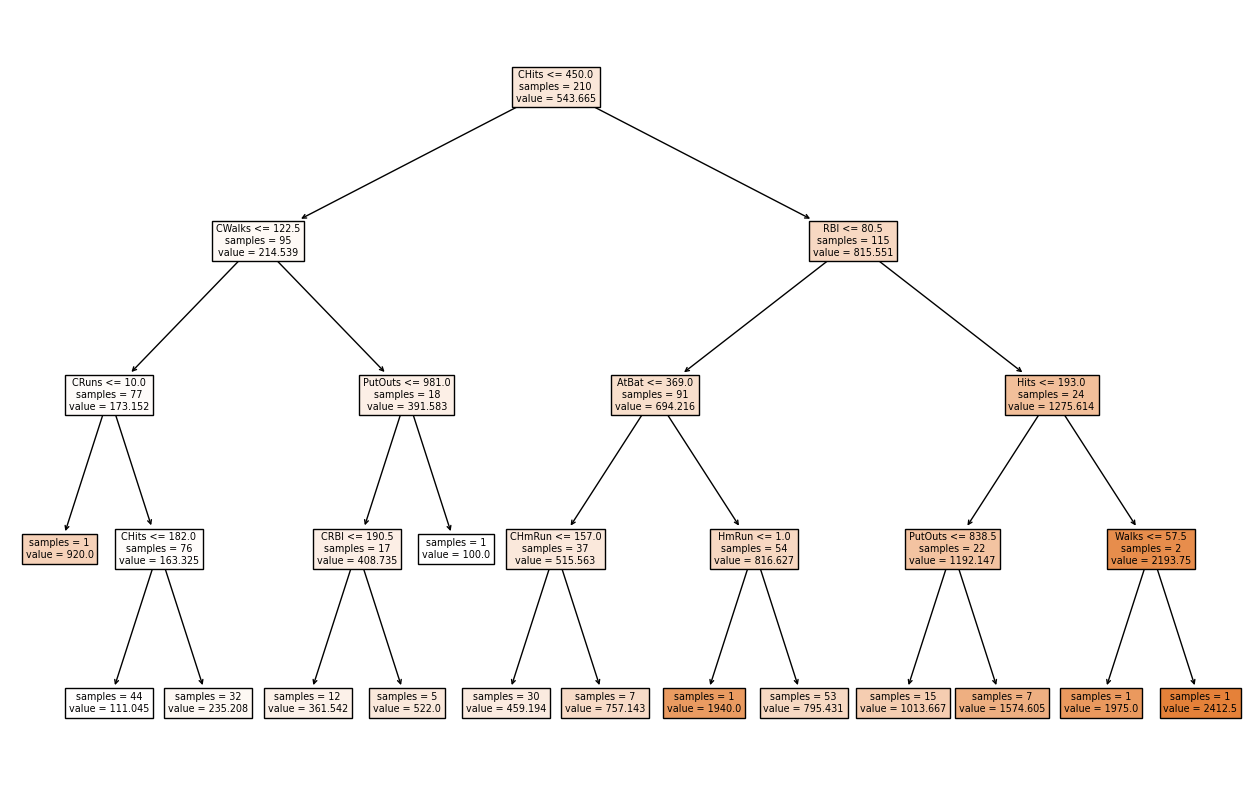

In [5]:
pipe = make_pipeline(DecisionTreeRegressor())

model_tree = DecisionTreeRegressor(max_depth=4)

X, y = df.drop(columns=['Salary', 'Errors']), df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_tree.fit(X_train, y_train)

fig = plt.figure(figsize=(16, 10))
plot_tree(model_tree, feature_names=X.columns, filled=True, impurity=False, rounded=False)

In [6]:
from sklearn.metrics import mean_squared_error

y_pred = model_tree.predict(X_test)
RSME = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RSME: {RSME:.2f}')

prcnt = 1-(RSME / y_test.mean())

print(f'RSME as a percentage of the mean: {prcnt:.2f}')


RSME: 433.07
RSME as a percentage of the mean: 0.14


---

In [7]:
df = pd.read_csv('../data/Default.csv')
df = pd.get_dummies(df, columns=['default', 'student'], drop_first=True, dtype=int)

In [9]:
X, y = df.drop(columns='default_Yes'), df['default_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4841
           1       0.33      0.33      0.33       159

    accuracy                           0.96      5000
   macro avg       0.65      0.66      0.66      5000
weighted avg       0.96      0.96      0.96      5000



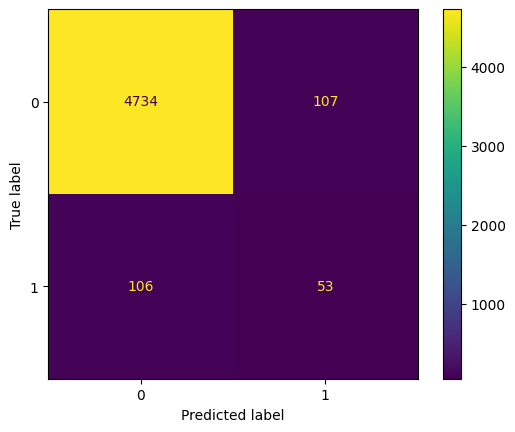

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()